In [1]:
import pandas as pd
import numpy as np
import warnings 
# 用来忽略seaborn绘图库产生的warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
%matplotlib inline

## 数据准备

为了方便，这里使用scikit-learn生成数据：

- 500个样本
- 有5个特征变量(f1--f5)
- 有3个分类变量(c1--c3)，其中c3是通过计算得出的包含8个类别的分类数据

In [42]:
from sklearn.datasets import make_multilabel_classification
X, Y  = make_multilabel_classification(n_samples=500, n_features=5, n_classes=5, n_labels=2, length=50, allow_unlabeled=True, sparse=False, return_indicator='dense', return_distributions=False, random_state=None)
df = pd.DataFrame(X, columns=['f1','f2','f3','f4','f5'])
df2 = pd.DataFrame(Y, columns=['c1','c2','cx','cy','cz'])
df2['c3']=df2['cx']*4 + df2['cy']*2 +df2['cz']
df = df.join(df2[['c1','c2','c3']])
df.head()

,f1,f2,f3,f4,f5,c1,c2,c3
0,1.0,6.0,20.0,2.0,16.0,0,0,1
1,8.0,9.0,7.0,9.0,5.0,0,0,4
2,7.0,7.0,13.0,2.0,15.0,0,1,3
3,11.0,9.0,11.0,8.0,11.0,0,1,4
4,10.0,13.0,15.0,10.0,2.0,1,0,0


## 一维散点图

一维散点图是直接汇出每个数据点，人工观察数据的分布。一维散点图不适合样本数过多的数据。

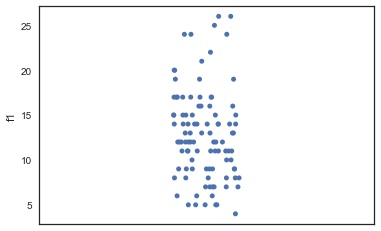

In [16]:
# jitter 是对数据进行“抖动”，避免画成一条竖线
sns.stripplot(y='f1', data=df[:100],jitter=True)

即使添加了抖动，数据点仍然有可能重叠。要完全避免重叠可以采取一些算法：

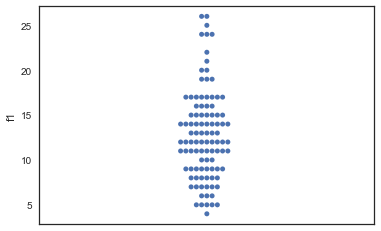

In [17]:
sns.swarmplot(y='f1', data=df[:100])

### 多个特征维

可以在一张图上绘制多个特征变量：

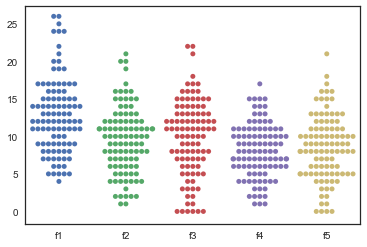

In [19]:
sns.swarmplot(data=df[['f1','f2','f3','f4','f5']][:100])

### 1个特征维 + 1个分类维

也可以对比一个特征变量，在不同类别中的分布情况：

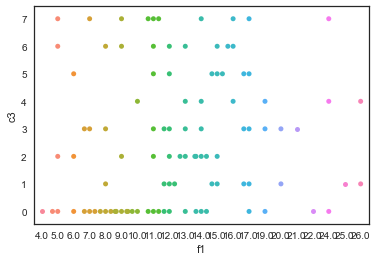

In [22]:
# 类别比较多时，可以水平绘制
sns.swarmplot(y='c3',x='f1', data=df[:100])

### 1个特征维 + 2个分类维

如果有两个分类维，可以在上图的基础上增加颜色区分：

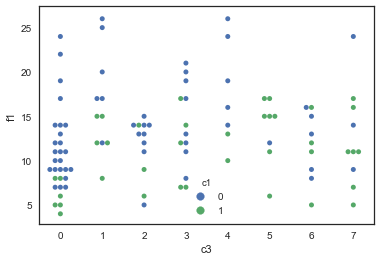

In [24]:
sns.swarmplot(x='c3',y='f1',hue='c1', data=df[:100])

## 箱线图/提琴图

箱线图(Box Plot), 也叫"盒式图","箱形图"。
将数据进行统计变换，显示数据位置和分散情况的关键信息，尤其在比较不同的母体数据时更可表现其差异。

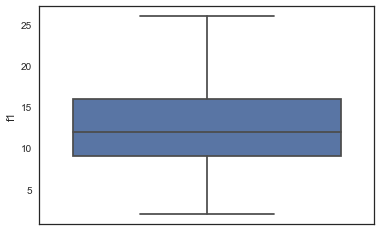

In [25]:
sns.boxplot(y='f1', data=df)

如上图所示，箱体的上下沿和中间分别是上下四分数和中位数；须线的边界是中位数到上线四分数的1.5倍距离，超出这个距离的数据作为奇异点。

### 多个特征维度

一般很少单独绘制一个特征维的箱线图，而是在一张图上同时绘制多个特征变量。如下图：

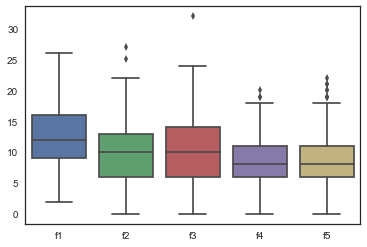

In [8]:
sns.boxplot(data=df[['f1','f2','f3','f4','f5']])

### 1个特征维 + 1个分类维

也可以对比一个特征变量，在不同类别中的分布情况：

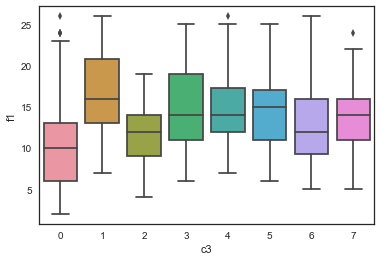

In [9]:
sns.boxplot(x='c3',y='f1', data=df)

sns可以很容易把两种图叠加。比如：

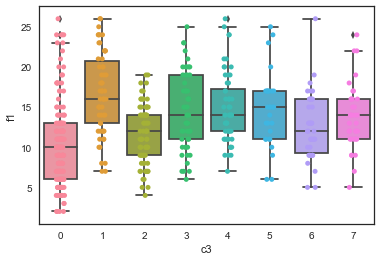

In [33]:
sns.boxplot(x='c3',y='f1', data=df)
sns.stripplot(x='c3', y='f1', data=df, jitter=True, edgecolor="gray")

### 1个特征维 + 2个分类维

如果有两个分类维，可以在上图的基础上增加颜色区分：

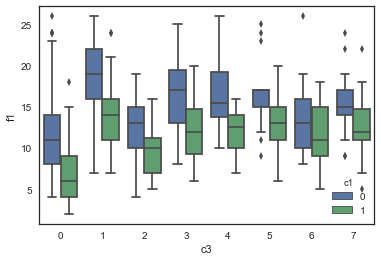

In [11]:
sns.boxplot(x='c3',y='f1',hue='c1',data=df)

### 提琴图

提琴图在箱线图的基础上，增加了核密度估计

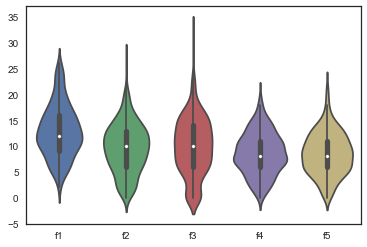

In [26]:
sns.violinplot(data=df[['f1','f2','f3','f4','f5']])

为了节省空间，当`hue`指定的分类变量是二分类时，可以通过指定`split=True`，用一个提琴同时绘制两组数据，以节省空间

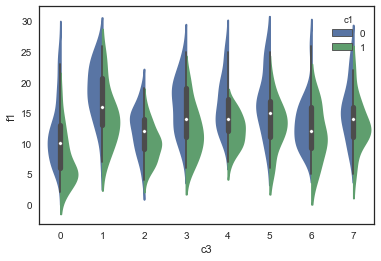

In [29]:
sns.violinplot(x='c3',y='f1',hue='c1',data=df, split=True)

## 直方图/密度曲线


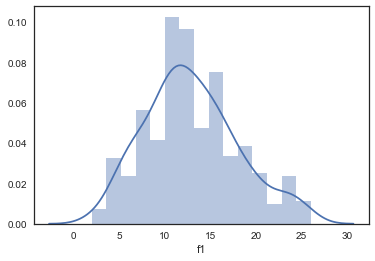

In [32]:
sns.distplot(df['f1'],bins=15, hist=True,kde=True, rug=False)

### 多个特征变量


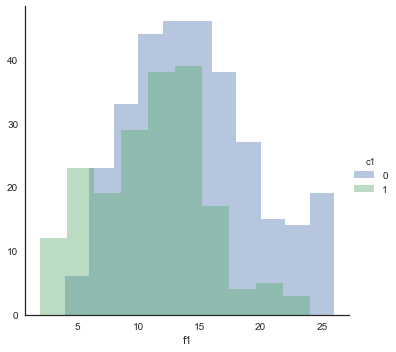

In [39]:
# 同时绘制多个特征变量的直方图
sns.FacetGrid(df, hue="c1", size=5).map(sns.distplot, 'f1',kde=False).add_legend()

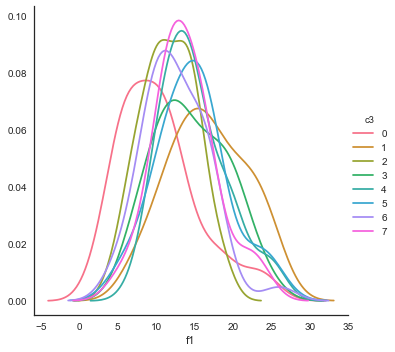

In [40]:
# 同时绘制多个特征变量的密度曲线
sns.FacetGrid(df, hue="c3", size=5).map(sns.kdeplot, 'f1').add_legend()

## 条形图/柱状图

### 1个分类维

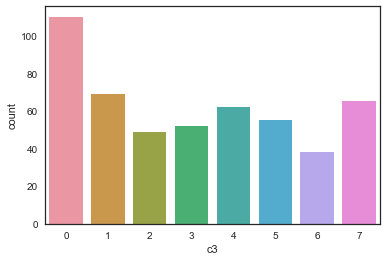

In [43]:
sns.countplot(x="c3",data=df)

### 2个分类维

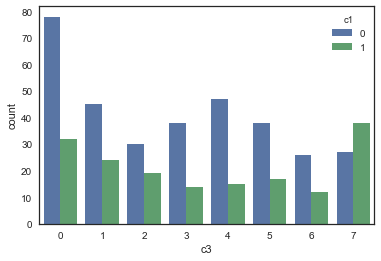

In [44]:
sns.countplot(x="c3",hue='c1',data=df)